In [2]:
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential

# 1. Create a synthetic stream
stream = WaveformGenerator()  # 21 dims, 3 classes 

In [8]:
from skmultiflow.data import FileStream

stream = FileStream('elec.csv', target_idx=-1, n_targets=1)
stream.prepare_for_use()        # parses types & resets pointer
print("Features:", stream.n_features, "  Classes:", stream.target_values)


Features: 6   Classes: [0, 1]


c:\Users\guy hadad\miniconda3\envs\stream\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


In [9]:
from skmultiflow.trees import HoeffdingTreeClassifier
ht = HoeffdingTreeClassifier()


Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


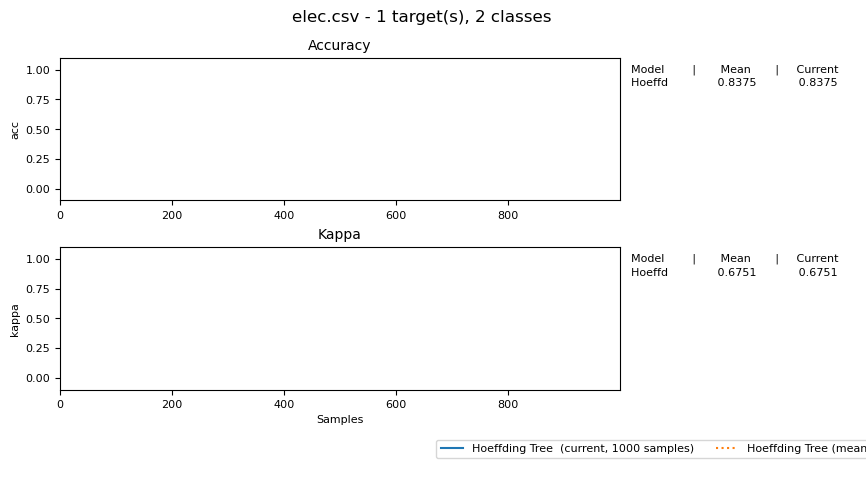

<Figure size 640x480 with 0 Axes>

 #------------------- [5%] [2.15s]

<Figure size 640x480 with 0 Axes>

 ###----------------- [15%] [4.62s]

<Figure size 640x480 with 0 Axes>

 ####---------------- [20%] [5.68s]

<Figure size 640x480 with 0 Axes>

 #####--------------- [25%] [6.60s]

<Figure size 640x480 with 0 Axes>

 #######------------- [35%] [8.35s]

<Figure size 640x480 with 0 Axes>


Processed samples: 16350
Mean performance:
Hoeffding Tree - Accuracy     : 0.8186
Hoeffding Tree - Kappa        : 0.6295


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [10]:
from skmultiflow.evaluation import EvaluatePrequential

evaluator = EvaluatePrequential(
        pretrain_size = 200,          # warm-up
        max_samples   = 45_312,       # full stream
        n_wait        = 1_000,        # log/plot every 1 000 points
        metrics       = ['accuracy', 'kappa'],
        show_plot     = True)

evaluator.evaluate(stream=stream,
                   model=ht,
                   model_names=['Hoeffding Tree'])


# Task

You need to show evaluation plot in a deiffrent data from https://github.com/scikit-multiflow/streaming-datasets with two diffrent metrics and one classifier